# MONTE CARLO SIMULATION FOR MONTE HALL PROBLEM

### Simulation Details
The simulation runs a specified number of rounds, each representing one game of the Monty Hall problem.
In each round, the doors are randomized to hide the prize and goats.
The player's initial choice is also randomized.
The host, following the rules of the Monty Hall problem, reveals a door with a goat behind it.
Depending on the player's chosen strategy (switch or stay), the final choice is determined.
The simulation tracks the win percentage for both strategies.

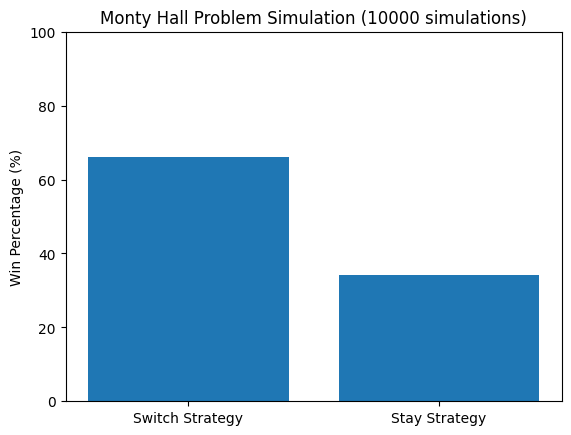

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate one round of the Monty Hall problem
def monty_hall_simulation(switch_strategy=True):
    # Define three doors: one with a prize (car) and two with goats
    doors = ['goat', 'goat', 'car']
    # Randomly shuffle the doors
    np.random.shuffle(doors)
    
    # Player's initial choice
    initial_choice = np.random.choice([0, 1, 2])
    
    # Host reveals a goat behind one of the other doors
    revealed_door = [i for i in range(3) if i != initial_choice and doors[i] == 'goat'][0]
    
    # Determine the remaining unopened doors
    remaining_doors = [i for i in range(3) if i != initial_choice and i != revealed_door]
    
    # If the player switches, they choose the remaining unopened door
    if switch_strategy:
        final_choice = remaining_doors[0]
    else:
        final_choice = initial_choice
    
    # Determine if the final choice is a win (car) or loss (goat)
    win = doors[final_choice] == 'car'
    
    return win

# Function to run multiple simulations and calculate win percentages
def run_simulations(num_simulations, switch_strategy=True):
    # Simulate Monty Hall problem for the specified number of times
    wins = sum([monty_hall_simulation(switch_strategy) for _ in range(num_simulations)])
    # Calculate the win percentage
    win_percentage = (wins / num_simulations) * 100
    return win_percentage

# Number of simulations to run
num_simulations = 10000

# Simulate with switching strategy and without switching
switch_win_percentage = run_simulations(num_simulations, switch_strategy=True)
stay_win_percentage = run_simulations(num_simulations, switch_strategy=False)

# Plot the results using a bar chart
plt.bar(['Switch Strategy', 'Stay Strategy'], [switch_win_percentage, stay_win_percentage])
plt.ylabel('Win Percentage (%)')
plt.title(f'Monty Hall Problem Simulation ({num_simulations} simulations)')
plt.ylim(0, 100)
plt.show()


# EXTENDING TO 100 doors:


Enter the number of doors: 100
Enter the number of doors revealed before asking for a switch: 48


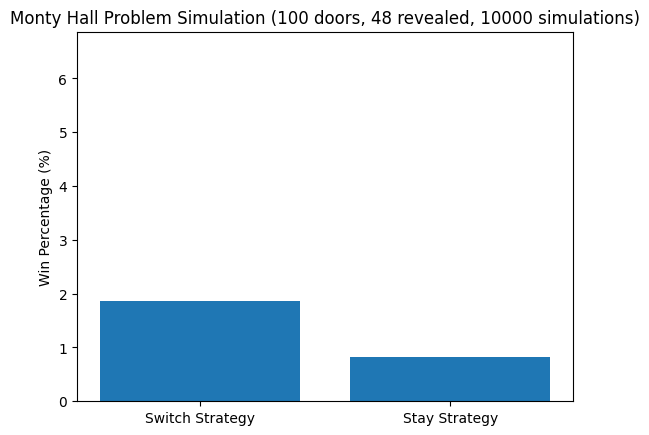

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Let's define a function to simulate one round of the Monty Hall problem with custom parameters
def monty_hall_simulation(num_doors=100, num_revealed=98, switch_strategy=True):
    # Let's generate a list of doors with one car and the rest goats
    doors = ['goat'] * (num_doors - 1) + ['car']
    # Let's shuffle the doors randomly
    np.random.shuffle(doors)
    
    # Here, the player makes their initial choice
    initial_choice = np.random.choice(range(num_doors))
    
    # The host reveals 'num_revealed' doors with goats behind them
    revealed_doors = [i for i in range(num_doors) if i != initial_choice and doors[i] == 'goat']
    np.random.shuffle(revealed_doors)
    revealed_goats = revealed_doors[:num_revealed]
    
    # Let's determine the remaining unopened doors
    remaining_doors = [i for i in range(num_doors) if i != initial_choice and i not in revealed_goats]
    
    # If the player chooses to switch, they select one of the remaining unopened doors
    if switch_strategy:
        final_choice = np.random.choice(remaining_doors)
    else:
        final_choice = initial_choice
    
    # We'll now determine if the final choice results in a win (car) or loss (goat)
    win = doors[final_choice] == 'car'
    
    return win

# Here, we define a function to run multiple simulations and calculate win percentages
def run_simulations(num_simulations, num_doors, num_revealed, switch_strategy=True):
    wins = sum([monty_hall_simulation(num_doors, num_revealed, switch_strategy) for _ in range(num_simulations)])
    win_percentage = (wins / num_simulations) * 100
    return win_percentage

# Let's set the number of simulations we want to run
num_simulations = 10000

# Now, we'll ask the user for input regarding the number of doors and doors to be revealed
num_doors = int(input("Enter the number of doors: "))
num_revealed = int(input("Enter the number of doors revealed before asking for a switch: "))

# We'll simulate both with and without the switching strategy
switch_win_percentage = run_simulations(num_simulations, num_doors, num_revealed, switch_strategy=True)
stay_win_percentage = run_simulations(num_simulations, num_doors, num_revealed, switch_strategy=False)

# Finally, let's visualize the results using a bar chart
plt.bar(['Switch Strategy', 'Stay Strategy'], [switch_win_percentage, stay_win_percentage])
plt.ylabel('Win Percentage (%)')
plt.title(f'Monty Hall Problem Simulation ({num_doors} doors, {num_revealed} revealed, {num_simulations} simulations)')
plt.ylim(0, switch_win_percentage + 5)
plt.show()


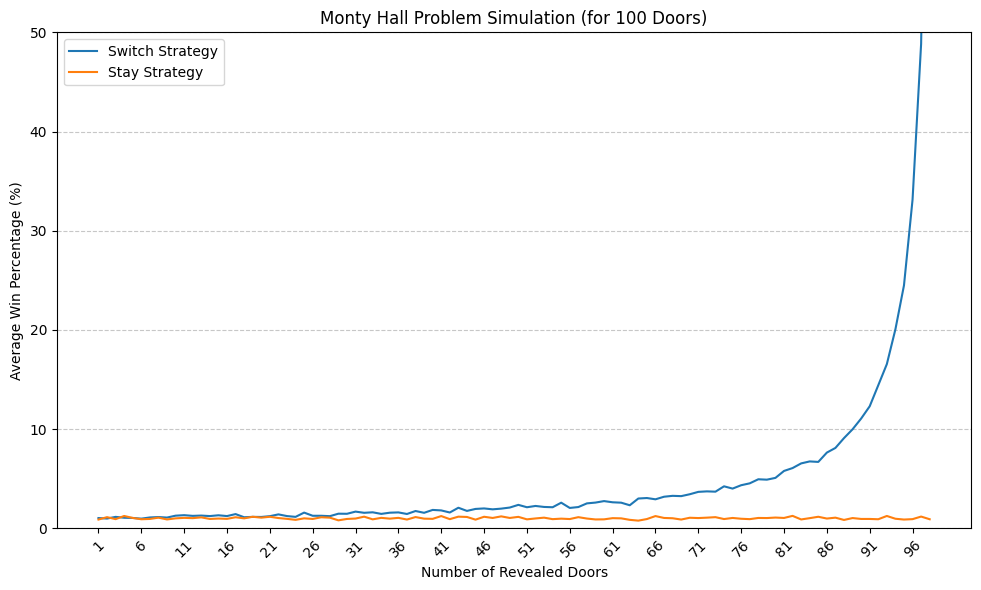

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Let's define the number of simulations we want to run for each combination
num_simulations = 10000

# We'll keep the number of doors fixed at 100 and vary the number of doors revealed
num_doors = 100
revealed_range = range(1, 99)  # Vary from 1 to 98 revealed doors

# We'll initialize empty lists to store average win percentages for switch and stay strategies
switch_win_percentages = []
stay_win_percentages = []

# Here, we'll loop through different numbers of revealed doors
for num_revealed in revealed_range:
    # We'll initialize empty lists to store win percentages for each simulation
    switch_wins = []
    stay_wins = []

    # Now, let's perform simulations for the current combination
    for _ in range(num_simulations):
        switch_win_percentage = run_simulations(1, num_doors, num_revealed, switch_strategy=True)
        stay_win_percentage = run_simulations(1, num_doors, num_revealed, switch_strategy=False)
        switch_wins.append(switch_win_percentage)
        stay_wins.append(stay_win_percentage)

    # Calculate the average win percentage for each strategy
    avg_switch_win_percentage = sum(switch_wins) / num_simulations
    avg_stay_win_percentage = sum(stay_wins) / num_simulations

    # Append the results to the lists
    switch_win_percentages.append(avg_switch_win_percentage)
    stay_win_percentages.append(avg_stay_win_percentage)

# Create a list of labels for the x-axis based on the number of revealed doors
x_labels = [f"{num_revealed}" for num_revealed in revealed_range]

# Now, let's create a figure and plot the variation in average win percentages
plt.figure(figsize=(10, 6))
plt.plot(x_labels, switch_win_percentages, label='Switch Strategy')
plt.plot(x_labels, stay_win_percentages, label='Stay Strategy')
plt.xlabel('Number of Revealed Doors')
plt.ylabel('Average Win Percentage (%)')
plt.title(f'Monty Hall Problem Simulation (for 100 Doors)')
plt.xticks(np.arange(0, len(x_labels), 5), rotation=45)  # Set x ticks every 5 positions
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, 50)

# Finally, we'll show the plot
plt.show()
